In [ ]:
!pip install pmdarima
!pip install shap
!pip install --upgrade mxnet~=1.7 gluonts
!pip install python-utils
!pip install plotly==4.1.0
!pip install -U scikit-learn

     |████████████████████████████████| 1.5MB 3.9MB/s 
     |████████████████████████████████| 9.5MB 24.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 358kB 3.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=4051f18119fd9fe389b3205e23134b23d45c88f7634523ae08a729e160247de1
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
     |████████████████████████████████| 46.9MB 82kB/s 
     |████████████████████████████████| 901kB 35.1MB/s 
     |████████████████████████████████| 10.1MB 23.8MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 7.1MB 2.9MB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, b

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import folium
import matplotlib.pyplot as plt
import math
import scipy
import statsmodels as sms
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
from sklearn.model_selection import train_test_split
import datetime
warnings.filterwarnings("ignore")
np.random.seed(32)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/country_vaccinations.csv')
data.tail(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
15656,Zimbabwe,ZWE,2021-04-27,433939.0,370676.0,63263.0,22329.0,15562.0,2.92,2.49,0.43,1047.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15657,Zimbabwe,ZWE,2021-04-28,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15658,Zimbabwe,ZWE,2021-04-29,477597.0,400771.0,76826.0,19584.0,17971.0,3.21,2.70,0.52,1209.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15659,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,85607.0,22745.0,19194.0,3.37,2.79,0.58,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15660,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,92164.0,19957.0,21171.0,3.50,2.88,0.62,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15661,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15662,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15663,Zimbabwe,ZWE,2021-05-04,559777.0,452191.0,107586.0,22261.0,17977.0,3.77,3.04,0.72,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15664,Zimbabwe,ZWE,2021-05-05,576233.0,461023.0,115210.0,16456.0,16889.0,3.88,3.10,0.78,1136.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15665,Zimbabwe,ZWE,2021-05-06,607355.0,478174.0,129181.0,31122.0,18537.0,4.09,3.22,0.87,1247.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              15666 non-null  object 
 1   iso_code                             15666 non-null  object 
 2   date                                 15666 non-null  object 
 3   total_vaccinations                   9437 non-null   float64
 4   people_vaccinated                    8754 non-null   float64
 5   people_fully_vaccinated              6502 non-null   float64
 6   daily_vaccinations_raw               7928 non-null   float64
 7   daily_vaccinations                   15465 non-null  float64
 8   total_vaccinations_per_hundred       9437 non-null   float64
 9   people_vaccinated_per_hundred        8754 non-null   float64
 10  people_fully_vaccinated_per_hundred  6502 non-null   float64
 11  daily_vaccinations_per_milli

In [ ]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(0)

In [ ]:
data.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar',
       'Greece', 'Greenland', 'Grenada', 'Gua

In [ ]:
data.vaccines.unique()

array(['Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Sputnik V', 'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac',
       'Sinopharm/Beijing', 'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sputnik V', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Moderna, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTec

In [ ]:
columns = ['country', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','people_fully_vaccinated_per_hundred','vaccines','iso_code']
latest_data = data[columns].groupby('country', as_index = True).max().sort_values(by='total_vaccinations', ascending = False)
latest_data.head(10)

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_fully_vaccinated_per_hundred,vaccines,iso_code
country,,,,,,,
China,2021-05-06,297734000.0,0.0,0.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",CHN
United States,2021-05-06,251973752.0,149462265.0,108926627.0,32.57,"Johnson&Johnson, Moderna, Pfizer/BioNTech",USA
India,2021-05-06,162603603.0,131058890.0,31544713.0,2.29,"Covaxin, Oxford/AstraZeneca",IND
United Kingdom,2021-05-05,51225890.0,34934171.0,16291719.0,24.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",GBR
Brazil,2021-05-06,46542392.0,31504414.0,15037978.0,7.07,"Oxford/AstraZeneca, Sinovac",BRA
England,2021-05-05,42864836.0,29232101.0,13632735.0,24.22,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",OWID_ENG
Germany,2021-05-06,33565445.0,26220901.0,7360108.0,8.78,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",DEU
Turkey,2021-05-06,24467719.0,14391595.0,10076124.0,11.95,"Pfizer/BioNTech, Sinovac",TUR
France,2021-05-05,23949989.0,16791193.0,7238601.0,10.62,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",FRA


In [ ]:
total_vaccines = pd.DataFrame()
vaccines = data.groupby('vaccines')
for col, group in vaccines:
    total_vaccines.loc[col,"total_vaccinations"] = group["daily_vaccinations"].sum()
total_vaccines = total_vaccines.sort_values(by='total_vaccinations', ascending = False)

In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.7):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = '{:.0f}%'.format(int(p.get_height()))
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() / 2
                value = '{:.1f}m'.format(int(p.get_width()) / 1000000)
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

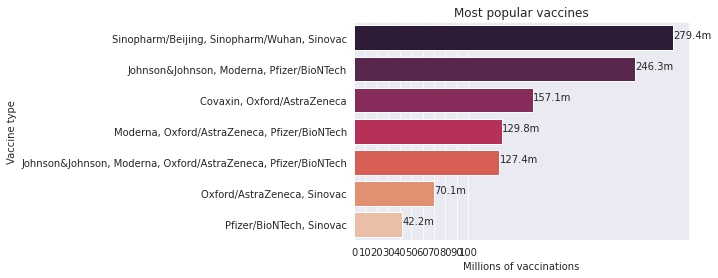

In [ ]:
sns.set_style('darkgrid')
ax = sns.barplot(x = total_vaccines.iloc[:7,:]['total_vaccinations'] , y =total_vaccines.iloc[:7,:].index, palette="rocket")
ax.set_xlabel('Millions of vaccinations')
ax.set_ylabel('Vaccine type')
ax.set_title('Most popular vaccines')
plt.xticks(ticks = [0,10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000,90000000,100000000],labels= [0,10,20,30,40,50,60,70,80,90,100])
show_values_on_bars(ax,h_v = 'h', space = 0.7)

In [ ]:
latest_data[latest_data['vaccines'] == 'Pfizer/BioNTech'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Japan,Pfizer/BioNTech,4197463.000000,3091529.000000,1105934.000000,2021-05-06 00:00:00
Slovakia,Pfizer/BioNTech,1740460.000000,1176143.000000,564317.000000,2021-05-06 00:00:00
Qatar,Pfizer/BioNTech,1732471.000000,1080415.000000,652056.000000,2021-05-06 00:00:00
Kuwait,Pfizer/BioNTech,1440000.000000,822000.000000,38000.000000,2021-05-06 00:00:00
New Zealand,Pfizer/BioNTech,304900.000000,217603.000000,87297.000000,2021-05-04 00:00:00
Cyprus,Pfizer/BioNTech,287816.000000,218323.000000,69463.000000,2021-05-01 00:00:00
Aruba,Pfizer/BioNTech,79553.000000,55371.000000,24182.000000,2021-05-06 00:00:00
Gibraltar,Pfizer/BioNTech,72674.000000,37988.000000,34686.000000,2021-05-06 00:00:00
Bermuda,Pfizer/BioNTech,55904.000000,32129.000000,23775.000000,2021-04-26 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Sputnik V'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Kazakhstan,Sputnik V,2025911.000000,1565681.000000,460230.000000,2021-05-05 00:00:00
Belarus,Sputnik V,328500.000000,244000.000000,84500.000000,2021-04-23 00:00:00
Venezuela,Sputnik V,250000.000000,250000.000000,0.000000,2021-04-12 00:00:00
Guinea,Sputnik V,150799.000000,97511.000000,53288.000000,2021-05-05 00:00:00
Paraguay,Sputnik V,143441.000000,131013.000000,12428.000000,2021-05-02 00:00:00
Algeria,Sputnik V,75000.000000,0.000000,0.000000,2021-02-19 00:00:00
Syria,Sputnik V,2500.000000,2500.000000,0.000000,2021-04-08 00:00:00
Armenia,Sputnik V,565.000000,565.000000,0.000000,2021-03-31 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Oxford/AstraZeneca'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Bangladesh,Oxford/AstraZeneca,9133278.000000,5819854.000000,3313424.000000,2021-05-06 00:00:00
Nigeria,Oxford/AstraZeneca,1266742.000000,1266742.000000,0.000000,2021-05-05 00:00:00
Ethiopia,Oxford/AstraZeneca,1215934.000000,0.000000,0.000000,2021-05-05 00:00:00
Myanmar,Oxford/AstraZeneca,1040000.000000,1000000.000000,40000.000000,2021-03-31 00:00:00
Ghana,Oxford/AstraZeneca,849527.000000,849527.000000,0.000000,2021-04-30 00:00:00
Vietnam,Oxford/AstraZeneca,675956.000000,675956.000000,0.000000,2021-05-05 00:00:00
Uzbekistan,Oxford/AstraZeneca,600369.000000,600369.000000,0.000000,2021-04-27 00:00:00
Bhutan,Oxford/AstraZeneca,481107.000000,481107.000000,0.000000,2021-05-06 00:00:00
Angola,Oxford/AstraZeneca,456349.000000,456349.000000,0.000000,2021-04-23 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
United Kingdom,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",51225890.000000,34934171.000000,16291719.000000,2021-05-05 00:00:00
England,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",42864836.000000,29232101.000000,13632735.000000,2021-05-05 00:00:00
Canada,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",14924694.000000,13728528.000000,1196166.000000,2021-05-06 00:00:00
Scotland,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",4260931.000000,2860635.000000,1400296.000000,2021-05-05 00:00:00
Portugal,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",3675613.000000,2692633.000000,982958.000000,2021-05-06 00:00:00
Greece,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",3424468.000000,2333921.000000,1090547.000000,2021-05-06 00:00:00
Wales,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2683297.000000,1884372.000000,798925.000000,2021-05-05 00:00:00
Denmark,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2155301.000000,1415117.000000,740184.000000,2021-05-04 00:00:00
Finland,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",1990774.000000,1804953.000000,185821.000000,2021-05-05 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Oxford/AstraZeneca, Sputnik V'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Kenya,"Oxford/AstraZeneca, Sputnik V",853081.000000,853081.000000,0.000000,2021-04-28 00:00:00
Nicaragua,"Oxford/AstraZeneca, Sputnik V",135130.000000,135130.000000,0.000000,2021-04-24 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Serbia,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",3715103.000000,2088102.000000,1627001.000000,2021-05-06 00:00:00
Mongolia,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",1946350.000000,1356678.000000,589672.000000,2021-05-06 00:00:00
Bahrain,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",1334658.000000,772205.000000,562453.000000,2021-05-06 00:00:00
Lebanon,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",509705.000000,325383.000000,184322.000000,2021-05-06 00:00:00
Montenegro,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",94291.000000,65390.000000,28901.000000,2021-05-06 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Oxford/AstraZeneca, Sinovac'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Brazil,"Oxford/AstraZeneca, Sinovac",46542392.000000,31504414.000000,15037978.000000,2021-05-06 00:00:00
Indonesia,"Oxford/AstraZeneca, Sinovac",21367754.000000,13028699.000000,8339055.000000,2021-05-06 00:00:00
Philippines,"Oxford/AstraZeneca, Sinovac",2129185.000000,1786480.000000,342705.000000,2021-05-05 00:00:00
Thailand,"Oxford/AstraZeneca, Sinovac",1651782.000000,1201258.000000,450524.000000,2021-05-06 00:00:00
Azerbaijan,"Oxford/AstraZeneca, Sinovac",1593883.000000,992252.000000,601631.000000,2021-05-06 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Sinopharm/Beijing'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Zimbabwe,Sinopharm/Beijing,607355.000000,478174.000000,129181.000000,2021-05-06 00:00:00
Senegal,Sinopharm/Beijing,421993.000000,421993.000000,0.000000,2021-05-06 00:00:00
Equatorial Guinea,Sinopharm/Beijing,75518.000000,64646.000000,10872.000000,2021-04-28 00:00:00
Mozambique,Sinopharm/Beijing,57305.000000,57305.000000,0.000000,2021-03-23 00:00:00
Cameroon,Sinopharm/Beijing,11000.000000,11000.000000,0.000000,2021-04-29 00:00:00
Gabon,Sinopharm/Beijing,8897.000000,6895.000000,2002.000000,2021-04-23 00:00:00
Mauritania,Sinopharm/Beijing,7038.000000,7038.000000,0.000000,2021-04-18 00:00:00
Niger,Sinopharm/Beijing,1366.000000,1366.000000,0.000000,2021-04-17 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Moderna, Pfizer/BioNTech'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Israel,"Moderna, Pfizer/BioNTech",10489167.000000,5417346.000000,5071821.000000,2021-05-06 00:00:00
Switzerland,"Moderna, Pfizer/BioNTech",2791978.000000,1841984.000000,949994.000000,2021-05-02 00:00:00
Singapore,"Moderna, Pfizer/BioNTech",2213888.000000,1364124.000000,849764.000000,2021-04-18 00:00:00
Curacao,"Moderna, Pfizer/BioNTech",106971.000000,76031.000000,30940.000000,2021-05-06 00:00:00
Faeroe Islands,"Moderna, Pfizer/BioNTech",21128.000000,14743.000000,6385.000000,2021-05-06 00:00:00
Liechtenstein,"Moderna, Pfizer/BioNTech",12998.000000,8815.000000,4183.000000,2021-05-02 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Pfizer/BioNTech, Sinovac'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Turkey,"Pfizer/BioNTech, Sinovac",24467719.000000,14391595.000000,10076124.000000,2021-05-06 00:00:00
Chile,"Pfizer/BioNTech, Sinovac",15296805.000000,8303682.000000,6993123.000000,2021-05-05 00:00:00
Hong Kong,"Pfizer/BioNTech, Sinovac",1623981.000000,1021217.000000,602764.000000,2021-05-06 00:00:00
Malaysia,"Pfizer/BioNTech, Sinovac",1500202.000000,914663.000000,585539.000000,2021-05-03 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
China,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",297734000.000000,0.000000,0.000000,2021-05-06 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Oxford/AstraZeneca, Pfizer/BioNTech'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Saudi Arabia,"Oxford/AstraZeneca, Pfizer/BioNTech",10065924.000000,0.000000,0.000000,2021-05-06 00:00:00
South Korea,"Oxford/AstraZeneca, Pfizer/BioNTech",4005806.000000,3608616.000000,397190.000000,2021-05-06 00:00:00
Sweden,"Oxford/AstraZeneca, Pfizer/BioNTech",3563609.000000,2769411.000000,794198.000000,2021-05-06 00:00:00
Australia,"Oxford/AstraZeneca, Pfizer/BioNTech",2473529.000000,159294.000000,0.000000,2021-05-06 00:00:00
Costa Rica,"Oxford/AstraZeneca, Pfizer/BioNTech",950252.000000,605099.000000,345153.000000,2021-05-03 00:00:00
Panama,"Oxford/AstraZeneca, Pfizer/BioNTech",731189.000000,496131.000000,235058.000000,2021-05-06 00:00:00
Slovenia,"Oxford/AstraZeneca, Pfizer/BioNTech",702666.000000,463252.000000,239414.000000,2021-05-06 00:00:00
Oman,"Oxford/AstraZeneca, Pfizer/BioNTech",315691.000000,253000.000000,73269.000000,2021-05-05 00:00:00
Jersey,"Oxford/AstraZeneca, Pfizer/BioNTech",88404.000000,52891.000000,35513.000000,2021-05-02 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Sinovac'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,


In [ ]:
latest_data[latest_data['vaccines'] == 'Moderna'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,


In [ ]:
latest_data[latest_data['vaccines'] == 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Hungary,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",6468466.000000,4153038.000000,2315428.000000,2021-05-05 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Covaxin, Oxford/AstraZeneca'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
India,"Covaxin, Oxford/AstraZeneca",162603603.000000,131058890.000000,31544713.000000,2021-05-06 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Pfizer/BioNTech, Sinopharm/Beijing'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Jordan,"Pfizer/BioNTech, Sinopharm/Beijing",1091048.000000,805020.000000,286028.000000,2021-05-04 00:00:00
Macao,"Pfizer/BioNTech, Sinopharm/Beijing",112748.000000,74059.000000,38831.000000,2021-05-06 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
North Macedonia,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",74076.000000,74076.000000,0.000000,2021-05-05 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Sinopharm/Beijing, Sputnik V'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Laos,"Sinopharm/Beijing, Sputnik V",184387.000000,126072.000000,58315.000000,2021-04-26 00:00:00
Kyrgyzstan,"Sinopharm/Beijing, Sputnik V",27858.000000,27000.000000,858.000000,2021-04-28 00:00:00
Congo,"Sinopharm/Beijing, Sputnik V",14297.000000,14297.000000,0.000000,2021-04-14 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Oxford/AstraZeneca, Sinopharm/Beijing'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Morocco,"Oxford/AstraZeneca, Sinopharm/Beijing",9680954.000000,5334087.000000,4346867.000000,2021-05-05 00:00:00
Nepal,"Oxford/AstraZeneca, Sinopharm/Beijing",2091511.000000,2091511.000000,0.000000,2021-04-28 00:00:00
Sri Lanka,"Oxford/AstraZeneca, Sinopharm/Beijing",1088093.000000,928107.000000,159986.000000,2021-05-06 00:00:00
Egypt,"Oxford/AstraZeneca, Sinopharm/Beijing",660000.000000,660000.000000,0.000000,2021-04-18 00:00:00
Iraq,"Oxford/AstraZeneca, Sinopharm/Beijing",298377.000000,298377.000000,0.000000,2021-04-23 00:00:00
Seychelles,"Oxford/AstraZeneca, Sinopharm/Beijing",127721.000000,68045.000000,59676.000000,2021-05-03 00:00:00
Somalia,"Oxford/AstraZeneca, Sinopharm/Beijing",117567.000000,117567.000000,0.000000,2021-04-17 00:00:00
Namibia,"Oxford/AstraZeneca, Sinopharm/Beijing",20005.000000,18837.000000,1168.000000,2021-04-28 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Argentina,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",8591061.000000,7399515.000000,1191546.000000,2021-05-06 00:00:00
Iran,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",1314641.000000,1083138.000000,231503.000000,2021-05-04 00:00:00
Bolivia,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",878563.000000,637694.000000,240869.000000,2021-05-03 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'EpiVacCorona, Sputnik V'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
Russia,"EpiVacCorona, Sputnik V",21177713.000000,12893563.000000,8284150.000000,2021-05-06 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Johnson&Johnson'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
South Africa,Johnson&Johnson,366101.000000,366101.000000,366101.000000,2021-05-05 00:00:00


In [ ]:
latest_data[latest_data['vaccines'] == 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V'][['vaccines','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','date']].sort_values(by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,date
country,,,,,
United Arab Emirates,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V",10907264.000000,5081853.000000,3836521.000000,2021-05-06 00:00:00


In [ ]:
# Sns settings
c = '#386B7F'
sns.set_style('darkgrid')

In [ ]:
latest_data[['people_fully_vaccinated_per_hundred','people_fully_vaccinated', 'date' ]].sort_values(by='people_fully_vaccinated_per_hundred', ascending = False).head(30).style.background_gradient(cmap = 'Blues')

,people_fully_vaccinated_per_hundred,people_fully_vaccinated,date
country,,,
Gibraltar,102.950000,34686.000000,2021-05-06 00:00:00
Seychelles,60.680000,59676.000000,2021-05-03 00:00:00
Israel,58.600000,5071821.000000,2021-05-06 00:00:00
Falkland Islands,50.960000,1775.000000,2021-04-14 00:00:00
Cayman Islands,49.470000,32511.000000,2021-05-05 00:00:00
United Arab Emirates,38.790000,3836521.000000,2021-05-06 00:00:00
Bermuda,38.180000,23775.000000,2021-04-26 00:00:00
Chile,36.580000,6993123.000000,2021-05-05 00:00:00
Jersey,35.140000,35513.000000,2021-05-02 00:00:00


In [ ]:
latest_data[['people_fully_vaccinated_per_hundred', 'people_fully_vaccinated']].sort_values(by='people_fully_vaccinated', ascending = False).head(10).style.background_gradient(cmap = 'Blues')

,people_fully_vaccinated_per_hundred,people_fully_vaccinated
country,,
United States,32.570000,108926627.000000
India,2.290000,31544713.000000
United Kingdom,24.000000,16291719.000000
Brazil,7.070000,15037978.000000
England,24.220000,13632735.000000
Turkey,11.950000,10076124.000000
Mexico,6.820000,8790655.000000
Indonesia,3.050000,8339055.000000
Russia,5.680000,8284150.000000


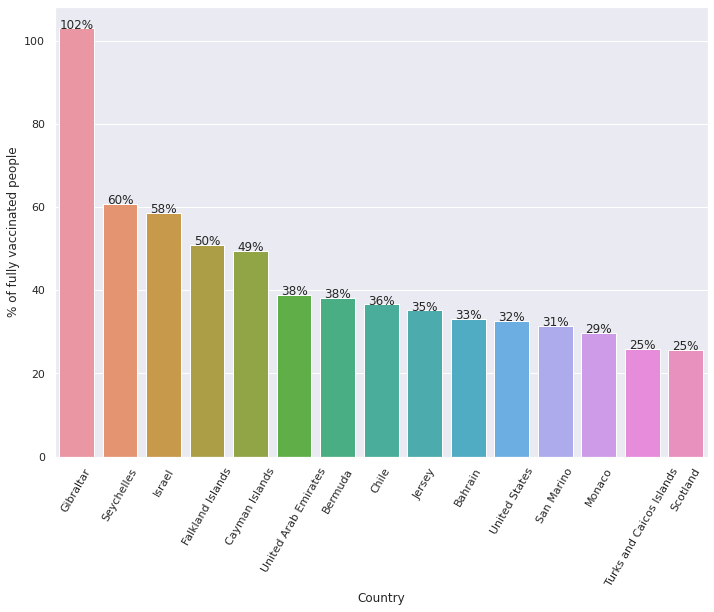

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax3 = sns.barplot(x = latest_data['people_fully_vaccinated_per_hundred'].sort_values(ascending = False).head(15).index,
                 y = latest_data['people_fully_vaccinated_per_hundred'].sort_values(ascending = False).head(15))
ax3.set_xlabel('Country')
ax3.set_ylabel('% of fully vaccinated people')
plt.xticks(rotation = 60)
show_values_on_bars(ax3, h_v = 'v')

In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.7):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = '{:.0f}m'.format(int(p.get_height()) / 1000000)
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() / 2
                value = '{:.1f}m'.format(int(p.get_width()) / 1000000)
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

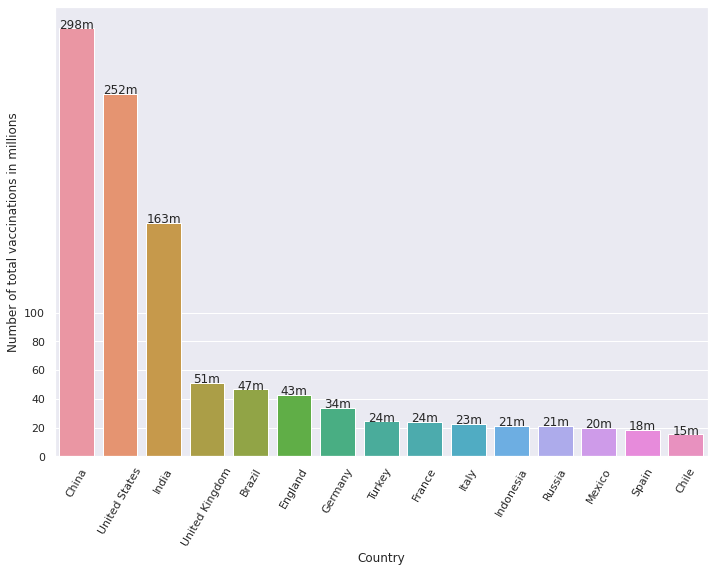

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax2 = sns.barplot(x = latest_data['total_vaccinations'].sort_values(ascending = False).head(15).index,
                 y = latest_data['total_vaccinations'].sort_values(ascending = False).head(15))
ax2.set_xlabel('Country')
ax2.set_ylabel('Number of total vaccinations in millions')
plt.yticks(ticks = [0,20000000,40000000,60000000,80000000,100000000], labels = [0,20,40,60,80,100])
plt.xticks(rotation = 60)
show_values_on_bars(ax2, h_v = 'v')

In [ ]:
conditions = [(latest_data['people_fully_vaccinated_per_hundred'] <= 2.5), 
              (latest_data['people_fully_vaccinated_per_hundred'] > 2.5) & (latest_data['people_fully_vaccinated_per_hundred'] <= 5),
              (latest_data['people_fully_vaccinated_per_hundred'] > 5) & (latest_data['people_fully_vaccinated_per_hundred'] <= 7.5),
              (latest_data['people_fully_vaccinated_per_hundred'] > 7.5) & (latest_data['people_fully_vaccinated_per_hundred'] <= 10),
             (latest_data['people_fully_vaccinated_per_hundred'] > 10)]
values = ['very low','low', 'moderated', 'medium', 'high']
new_data = latest_data
new_data['vaccination_level'] = np.select(conditions, values)
new_data.head(10)

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_fully_vaccinated_per_hundred,vaccines,iso_code,vaccination_level
country,,,,,,,,
China,2021-05-06,297734000.0,0.0,0.0,0.00,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",CHN,very low
United States,2021-05-06,251973752.0,149462265.0,108926627.0,32.57,"Johnson&Johnson, Moderna, Pfizer/BioNTech",USA,high
India,2021-05-06,162603603.0,131058890.0,31544713.0,2.29,"Covaxin, Oxford/AstraZeneca",IND,very low
United Kingdom,2021-05-05,51225890.0,34934171.0,16291719.0,24.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",GBR,high
Brazil,2021-05-06,46542392.0,31504414.0,15037978.0,7.07,"Oxford/AstraZeneca, Sinovac",BRA,moderated
England,2021-05-05,42864836.0,29232101.0,13632735.0,24.22,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",OWID_ENG,high
Germany,2021-05-06,33565445.0,26220901.0,7360108.0,8.78,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",DEU,medium
Turkey,2021-05-06,24467719.0,14391595.0,10076124.0,11.95,"Pfizer/BioNTech, Sinovac",TUR,high
France,2021-05-05,23949989.0,16791193.0,7238601.0,10.62,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",FRA,high


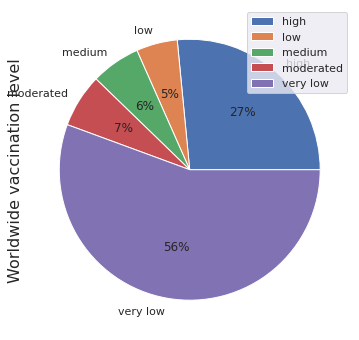

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
new_data.groupby('vaccination_level').size().plot(kind='pie', autopct='%1.0f%%', ax = ax)
ax.set_ylabel('Worldwide vaccination level', fontsize = 16)
plt.legend()
plt.show()

In [ ]:
daily_data = data[['daily_vaccinations','date']].groupby('date', as_index = False).sum()
daily_data['vac_test'] = daily_data['daily_vaccinations']
daily_data.head(10)

,date,daily_vaccinations,vac_test
0,2020-12-14,0.0,0.0
1,2020-12-15,718.0,718.0
2,2020-12-16,192366.0,192366.0
3,2020-12-17,193256.0,193256.0
4,2020-12-18,193649.0,193649.0
5,2020-12-19,193235.0,193235.0
6,2020-12-20,200354.0,200354.0
7,2020-12-21,267874.0,267874.0
8,2020-12-22,347612.0,347612.0
9,2020-12-23,391560.0,391560.0


In [ ]:
daily_data['year'] = daily_data['date'].dt.year
daily_data['month'] = daily_data['date'].dt.month
daily_data['day'] = daily_data['date'].dt.day
daily_data.tail(10)

,date,daily_vaccinations,vac_test,year,month,day
134,2021-04-27,18414295.0,18414295.0,2021,4,27
135,2021-04-28,19215486.0,19215486.0,2021,4,28
136,2021-04-29,19573439.0,19573439.0,2021,4,29
137,2021-04-30,20398287.0,20398287.0,2021,4,30
138,2021-05-01,20334355.0,20334355.0,2021,5,1
139,2021-05-02,19995640.0,19995640.0,2021,5,2
140,2021-05-03,19292226.0,19292226.0,2021,5,3
141,2021-05-04,18816094.0,18816094.0,2021,5,4
142,2021-05-05,18135652.0,18135652.0,2021,5,5
143,2021-05-06,14911882.0,14911882.0,2021,5,6


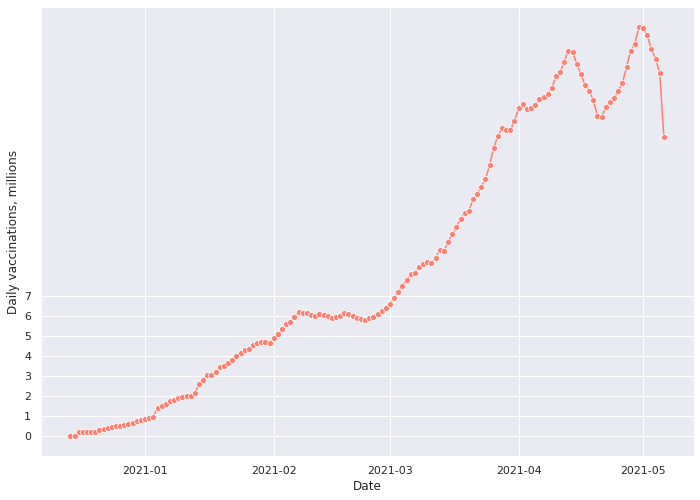

In [ ]:
ax = sns.lineplot(x = daily_data['date'], y = daily_data['daily_vaccinations'], color='salmon', marker='o')
ax.set_xlabel('Date')
plt.yticks(ticks = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000], labels = [0, 1, 2, 3, 4, 5, 6, 7])
ax.set_ylabel('Daily vaccinations, millions')
plt.show()

In [ ]:
jan = daily_data[daily_data['month'] == 1]
feb = daily_data[daily_data['month'] == 2]
mar = daily_data[daily_data['month'] == 3]

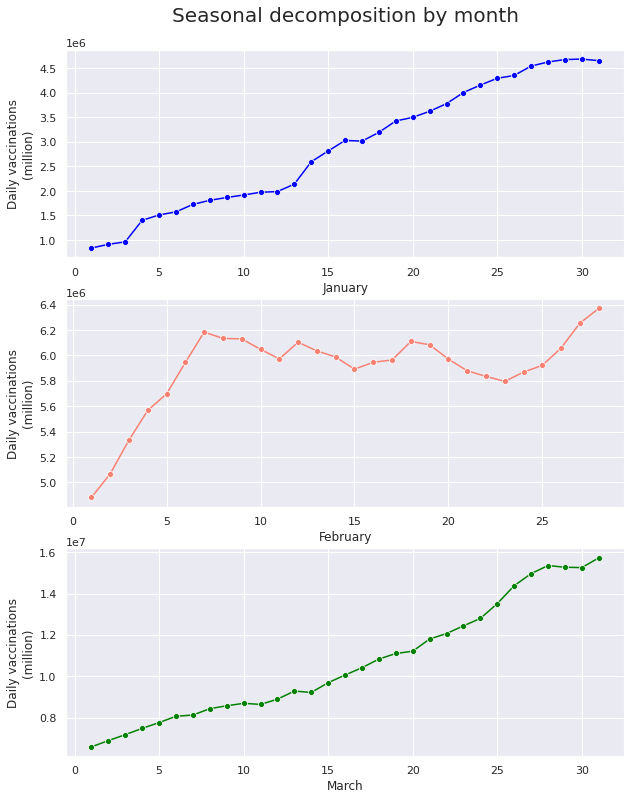

In [ ]:
# define figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,13))
# creating subplot 1
sns.lineplot(x = jan['day'], y = jan['daily_vaccinations'], color='blue', marker='o', ax=ax1)
ax1.set(xlabel = 'January', ylabel = 'Daily vaccinations\n(million)')
ax1.set_title('Seasonal decomposition by month\n', fontsize = 20)
# creating subplot 2
sns.lineplot(x = feb['day'], y = feb['daily_vaccinations'], color='salmon', marker='o', ax=ax2)
ax2.set(xlabel = 'February', ylabel = 'Daily vaccinations\n(million)')
# creating subplot 3
sns.lineplot(x = mar['day'], y = mar['daily_vaccinations'], color='green', marker='o', ax=ax3)
ax3.set(xlabel = 'March', ylabel = 'Daily vaccinations\n(million)')

plt.show()

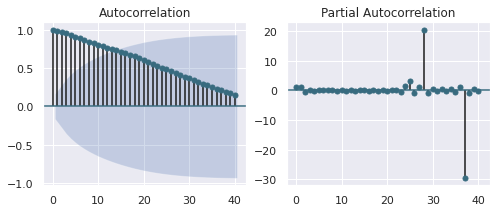

In [ ]:
plt.figure(figsize = (8,3))
plt.subplot(121); plot_acf(daily_data['daily_vaccinations'], lags = 40, ax = plt.gca(), color = c)
plt.subplot(122); plot_pacf(daily_data['daily_vaccinations'], lags = 40,ax = plt.gca(), color = c)
plt.show()

In [ ]:
adfuller(daily_data['daily_vaccinations'])

(-1.377918494323072,
 0.5928153021134275,
 6,
 137,
 {'1%': -3.479007355368944,
  '10%': -2.5781488587564603,
  '5%': -2.8828782366015093},
 3633.8311587738613)

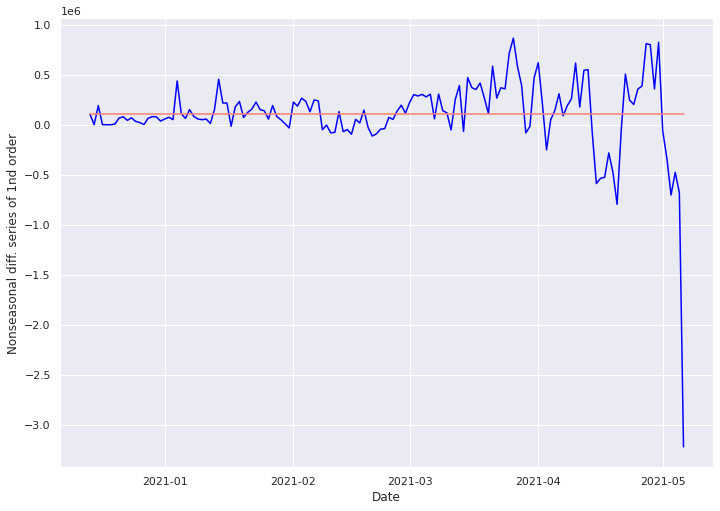

(-1.1384087268506504,
 0.6995145336638964,
 14,
 129,
 {'1%': -3.482087964046026,
  '10%': -2.578864381347275,
  '5%': -2.8842185101614626},
 3632.8229192616664)

In [ ]:
daily_data['diff1'] = daily_data['daily_vaccinations'].diff()
daily_data['diff1'] = daily_data['diff1'].fillna(daily_data['diff1'].mean())
ax = sns.lineplot(x = daily_data['date'], y = daily_data['diff1'], color='blue')
sns.lineplot(x = daily_data['date'], y = daily_data['diff1'].mean(), color='salmon')
plt.xlabel('Date')
plt.ylabel('Nonseasonal diff. series of 1nd order')
plt.show()
adfuller(daily_data.diff1)

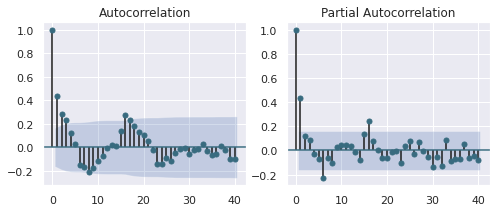

In [ ]:
plt.figure(figsize = (8,3))
plt.subplot(121); plot_acf(daily_data['diff1'], lags = 40, ax = plt.gca(), color = c)
plt.subplot(122); plot_pacf(daily_data['diff1'], lags = 40,ax = plt.gca(), color = c)
plt.show()

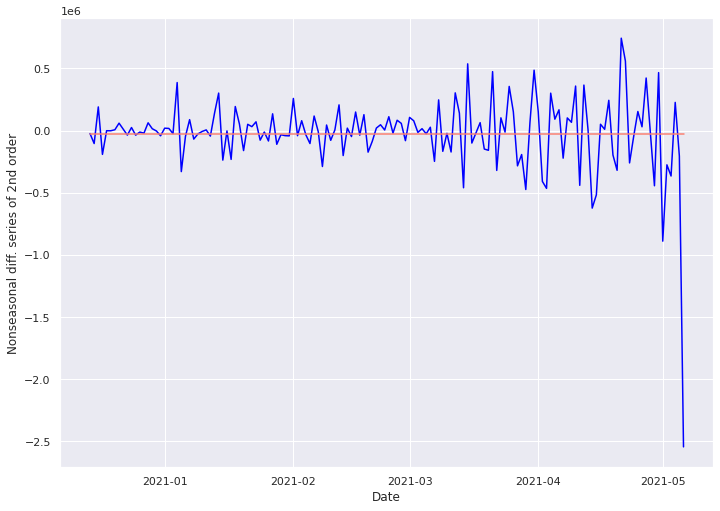

(-4.824017747796392,
 4.891518678781355e-05,
 14,
 129,
 {'1%': -3.482087964046026,
  '10%': -2.578864381347275,
  '5%': -2.8842185101614626},
 3616.1608147093734)

In [ ]:
daily_data['diff2'] = daily_data['diff1'].diff()
daily_data['diff2'] = daily_data['diff2'].fillna(daily_data['diff2'].mean())
ax = sns.lineplot(x = daily_data['date'], y = daily_data['diff2'], color='blue')
sns.lineplot(x = daily_data['date'], y = daily_data['diff2'].mean(), color='salmon')
plt.xlabel('Date')
plt.ylabel('Nonseasonal diff. series of 2nd order')
plt.show()
adfuller(daily_data.diff2)

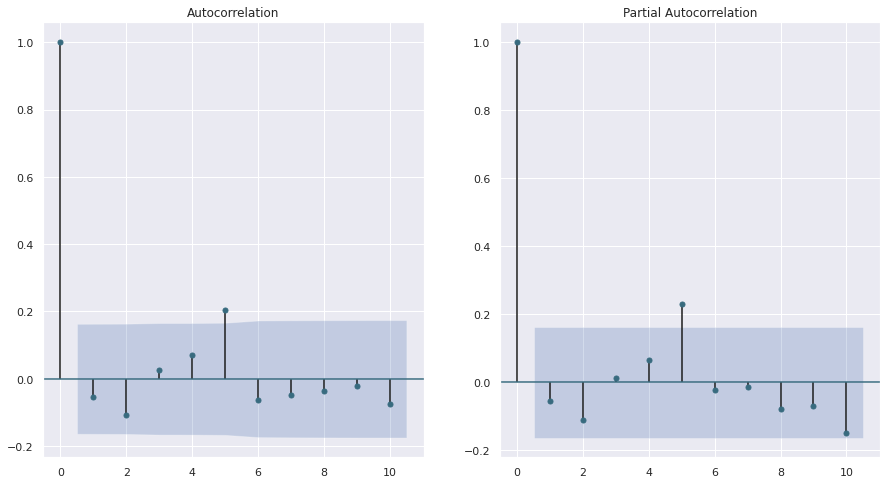

In [ ]:
plt.figure(figsize = (15,8))
plt.subplot(121); plot_acf(daily_data['diff2'], lags = 10, ax = plt.gca(), color = c)
plt.subplot(122); plot_pacf(daily_data['diff2'], lags = 10,ax = plt.gca(), color = c)
plt.show()

# ARIMA

2903    2.344639e+06
2904    3.045746e+06
2905    3.652092e+06
2906    4.054637e+06
2907    4.165559e+06
2908    4.450660e+06
2909    4.596997e+06
2910    4.975335e+06
2911    5.069298e+06
2912    5.248863e+06
2913    4.721994e+06
2914    4.786322e+06
2915    4.433046e+06
2916    4.475221e+06
2917    4.034426e+06
2918    4.096626e+06
2919    3.808703e+06
2920    4.049224e+06
2921    3.842987e+06
2922    4.315313e+06
2923    4.208288e+06
2924    4.354117e+06
2925    3.909869e+06
2926    3.669984e+06
2927    3.595287e+06
2928    3.513984e+06
2929    3.194750e+06
2930    3.399328e+06
2931    3.649746e+06
2932    4.103750e+06
2933    4.103273e+06
2934    4.480501e+06
2935    4.779910e+06
2936    4.993802e+06
2937    5.433077e+06
2938    5.790218e+06
2939    6.152881e+06
2940    7.407377e+06
2941    7.034914e+06
2942    7.288071e+06
2943    7.160602e+06
2944    6.841085e+06
2945    6.381388e+06
Name: predicted_mean, dtype: float64


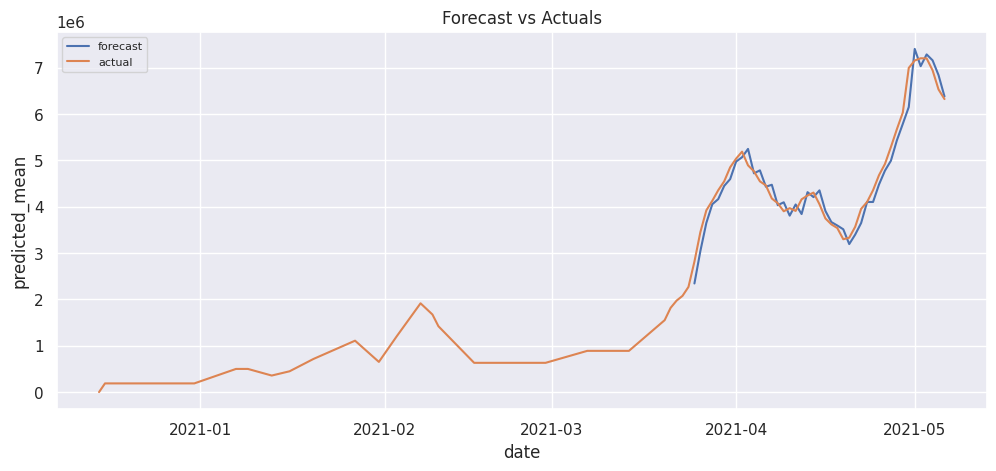

In [ ]:
train = data[data['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['daily_vaccinations'][:100]
test = data[data['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['daily_vaccinations'][100:]
model = ARIMA(data[data['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['daily_vaccinations'][:200], order = (0,1,1))
model = model.fit()
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ = 'levels')
print(pred)
plt.figure(figsize=(12,5), dpi=100)
ax = sns.lineplot(x=data[data['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['date'], y = pred, label='forecast')
sns.lineplot(x=data[data['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['date'], y = data[data['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['daily_vaccinations'][:200], label='actual', ax=ax)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
mean_squared_error(test, pred, squared = False)

249051.47093751206

In [ ]:
test.mean()

4704037.627906977

In [ ]:
mean_absolute_percentage_error(test,pred)

0.044540527091151666

In [ ]:
from sklearn.metrics import r2_score
r2_score(test, pred)

0.9538258720430959

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test, pred))

201014.1450921627


In [ ]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(test, pred))

191870.19495582115


In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(test, pred))
print(rmse)

249051.47093751206


15699    2.923380e+08
15700    2.923380e+08
15701    2.923380e+08
15702    2.923380e+08
15703    2.923380e+08
15704    2.923380e+08
15705    2.923380e+08
15706    2.923380e+08
15707    2.923380e+08
15708    2.923380e+08
Name: predicted_mean, dtype: float64


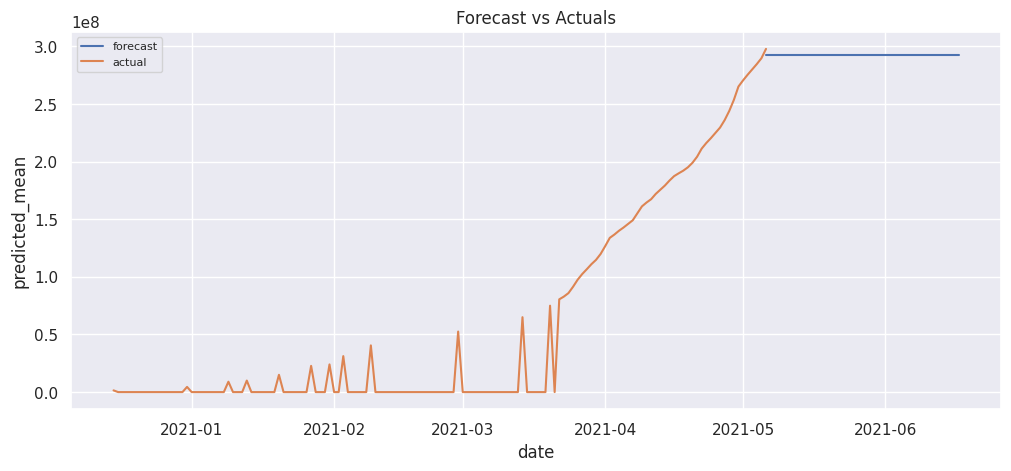

In [ ]:
index_fut_dat = pd.date_range(start='2021-05-06', end='2021-06-17')
model_full = ARIMA(data[data['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['total_vaccinations'], order = (0,1,1))
model_full = model_full.fit()
pred2 = model_full.predict(start=len(data), end=len(data)+len(test)-1, typ = 'levels')
print(pred2.tail(10))
pred2.index = index_fut_dat
plt.figure(figsize=(12,5), dpi=100)
ax = sns.lineplot(x=pred2.index, y = pred2, label='forecast')
sns.lineplot(x=data[data['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['date'], y = data[data['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['total_vaccinations'], label='actual', ax=ax)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
mean_squared_error(test, pred2, squared = False)

287636279.926935

In [ ]:
test.mean()

4704037.627906977

In [ ]:
mean_absolute_percentage_error(test,pred2)

64.5913133480779

In [ ]:
from sklearn.metrics import r2_score
r2_score(test, pred2)

-61588.65998311041

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test, pred))

201014.1450921627


In [ ]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(test, pred2))

287980839.44333494


In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(test, pred2))
print(rmse)

287636279.926935
